In [1]:
!pip install numpy networkx pandas

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [155]:
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import numpy as np
from itertools import combinations
import pandas as pd

In [219]:
def plotGraph(G, given = [], colorNodes = []):
    plt.figure(figsize=(5, 5))
    pos = nx.circular_layout(G)
    nx.draw(G, pos=pos,
            node_size=250, width=1,
            node_color='#000044', edge_color='#000099', font_color='w', font_size=10,
            with_labels=True)
    nx.draw_networkx_nodes(G, pos,
            nodelist=given, node_size=250, width=1,
            node_color='#888888', edge_color='#000099')
    nx.draw_networkx_nodes(G, pos,
            nodelist=colorNodes, node_size=250, width=1,
            node_color='#990000', edge_color='#000099')

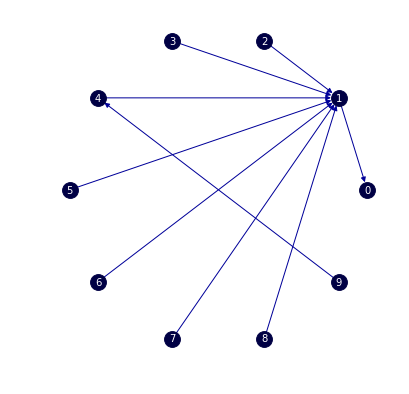

In [232]:
G = nx.gn_graph(10)
plotGraph(G)

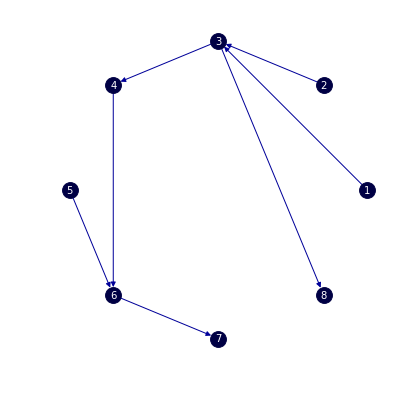

In [78]:
G = nx.DiGraph()
G.add_nodes_from(range(1, 9))
G.add_edges_from([(1,3),(2,3),(3,4),(3,8),(4,6),(5,6),(6,7)])
plotGraph(G)

In [70]:
def getSubgraph(G, nodes):
    s = set()
    toCheck = nodes
    while len(toCheck) > 0:
        node = toCheck.pop()
        if (node not in s):
            s.add(node)
            toCheck += G.predecessors(node)
    return G.subgraph(s)

In [90]:
def cartesian(x):
    y = np.transpose([np.tile(x, len(x)), np.repeat(x, len(x))])
    return np.array(list(filter(lambda x: x[0] != x[1], y)))

In [115]:
def moralize(G):
    newEdges = []
    for node in G.nodes:
        parents = list(G.predecessors(node))
        newEdges += cartesian(parents).tolist()
    H = G.copy()
    H.add_edges_from(newEdges)
    return H

In [118]:
def removeGivens(G, givens):
    H = G.copy()
    H.remove_nodes_from(givens)
    return H

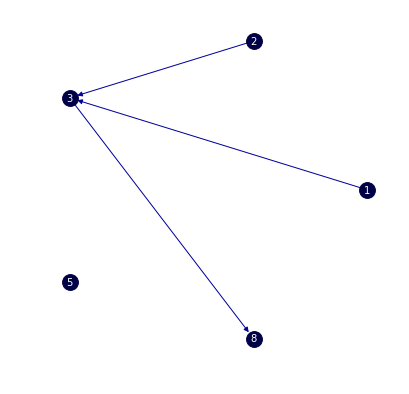

In [80]:
H = getSubgraph(G, [8, 5, 3])
plotGraph(H)

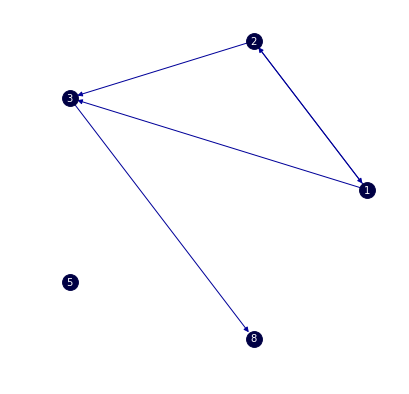

In [116]:
H2 = moralize(H)
plotGraph(H2)

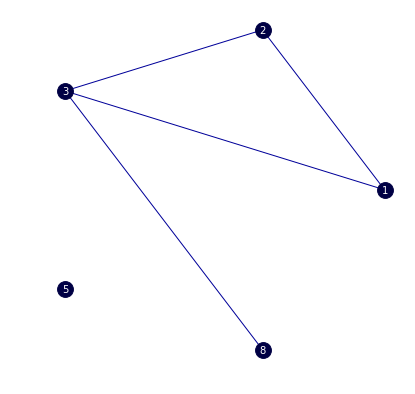

In [117]:
H3 = H2.to_undirected()
plotGraph(H3)

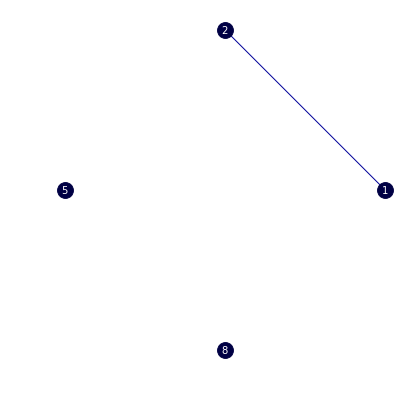

In [120]:
H4 = removeGivens(H3, [3])
plotGraph(H4)

In [126]:
def isSeparable(G, start, end, given):
    ancestorsG = getSubgraph(G, [start, end, *given])
    moralizedG = moralize(ancestorsG)
    undirectedG = moralizedG.to_undirected()
    finalG = removeGivens(undirectedG, given)
    return not nx.has_path(finalG, start, end)

### Analisys

In [235]:
given = [1]
nodes = set(filter(lambda x: x not in given, G.nodes))

dSeparated = pd.DataFrame(columns=['a', 'b', 'separated'])
for a, b in cartesian(list(nodes)):
    dS = isSeparable(G, b, a, given)
    dSeparated = dSeparated.append(pd.Series({ 'a': b, 'b': a, 'separated': dS }), ignore_index=True)
dSeparated.set_index(['a', 'b'], inplace=True)

In [238]:
# dSeparated
dSeparated.loc[dSeparated['separated'] == True]

separated
a b          
0 2      True
  3      True
  4      True
  5      True
  6      True
  7      True
  8      True
  9      True
2 0      True
3 0      True
4 0      True
5 0      True
6 0      True
7 0      True
8 0      True
9 0      True

In [239]:
dSepVertices = dSeparated.groupby('a').apply(lambda x: pd.Series([x.all()['separated']]))
dSepVertices.loc[dSepVertices[0]]

,0
a,
0,True


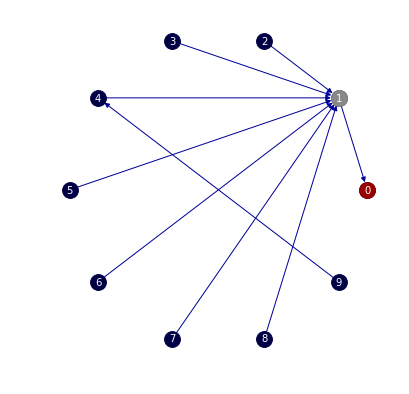

In [237]:
colorNodes = dSepVertices.loc[dSepVertices[0]].reset_index()['a'].tolist()
# colorNodes
plotGraph(G, given, colorNodes)